# This file is used for the purpose of  checking which machine learning model is best for our data.

In [189]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import r2_score 

In [191]:
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [192]:
import seaborn as sns

In [193]:
df1 = pd.read_csv("MagicBricks.csv")

In [194]:
# Exploratory DATA ANALYSIS for machine training

In [195]:
rows,cols = df1.shape

In [196]:
print(f"rows = {rows}\ncols={cols}")

rows = 1259
cols=11


In [197]:
df1.head(5)

,Area(sqft),BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [198]:
df1.describe()

,Area(sqft),BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


<AxesSubplot:xlabel='BHK'>

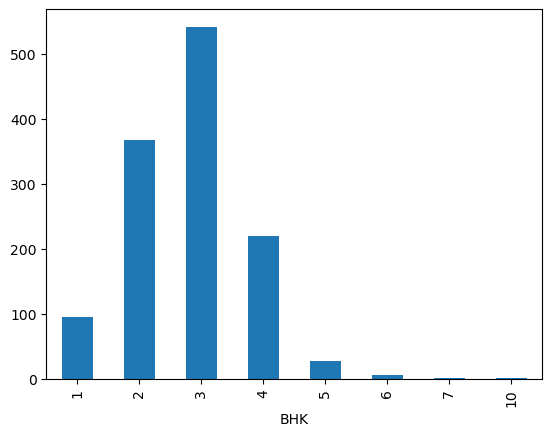

In [199]:
df2 = df1.groupby("BHK").count()
df2["Transaction"].plot(kind="bar")

In [200]:
df1['BHK'].value_counts()

3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64

In [201]:
'''
As we dont want to train our model with the rare values in our dataset, we are going to remove them.
'''
df1.drop([721,345,163,164,261,352,353,585],inplace=True)

In [202]:
df1['BHK'].value_counts()

3    541
2    367
4    220
1     96
5     27
Name: BHK, dtype: int64

<AxesSubplot:xlabel='Bathroom'>

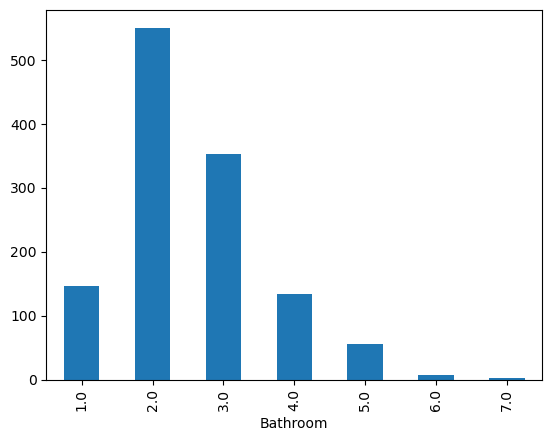

In [203]:
df2 = df1.groupby("Bathroom").count()
df2["Transaction"].plot(kind="bar")

In [204]:
# Same goes with bathroom as it also contain rare values 
# So we need to remove them
df1.drop([225,495,527,659,676,681,1211,248,1029],inplace=True)

In [205]:
df1['Bathroom'].value_counts()

2.0    551
3.0    353
1.0    146
4.0    134
5.0     56
Name: Bathroom, dtype: int64

<AxesSubplot:xlabel='Furnishing', ylabel='Price'>

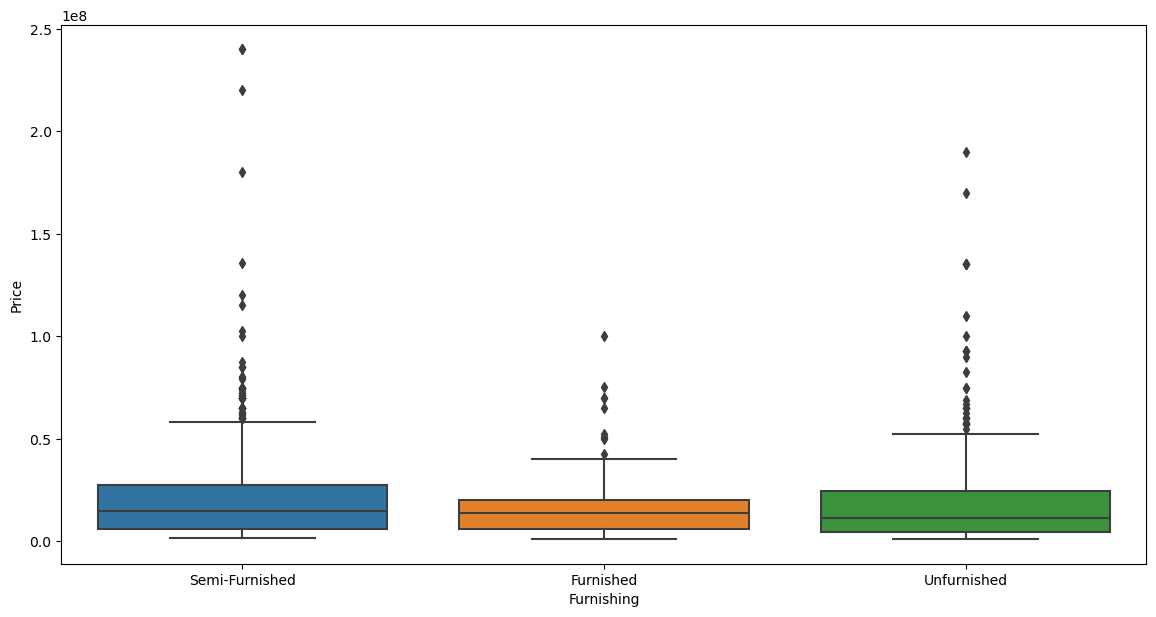

In [206]:
plt.figure(figsize=(14,7))
sns.boxplot(x=df1.Furnishing,y=df1.Price)

In [207]:
# Filling null or NaN values 
df1.isnull().sum()

Area(sqft)       0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         32
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       240
dtype: int64

In [208]:
df1.Parking.fillna(0,inplace=True)
df1['Parking'].replace([39,114],1,inplace=True)
df1['Parking'].replace([5,9,10],4,inplace=True)

<AxesSubplot:xlabel='Area(sqft)', ylabel='Price'>

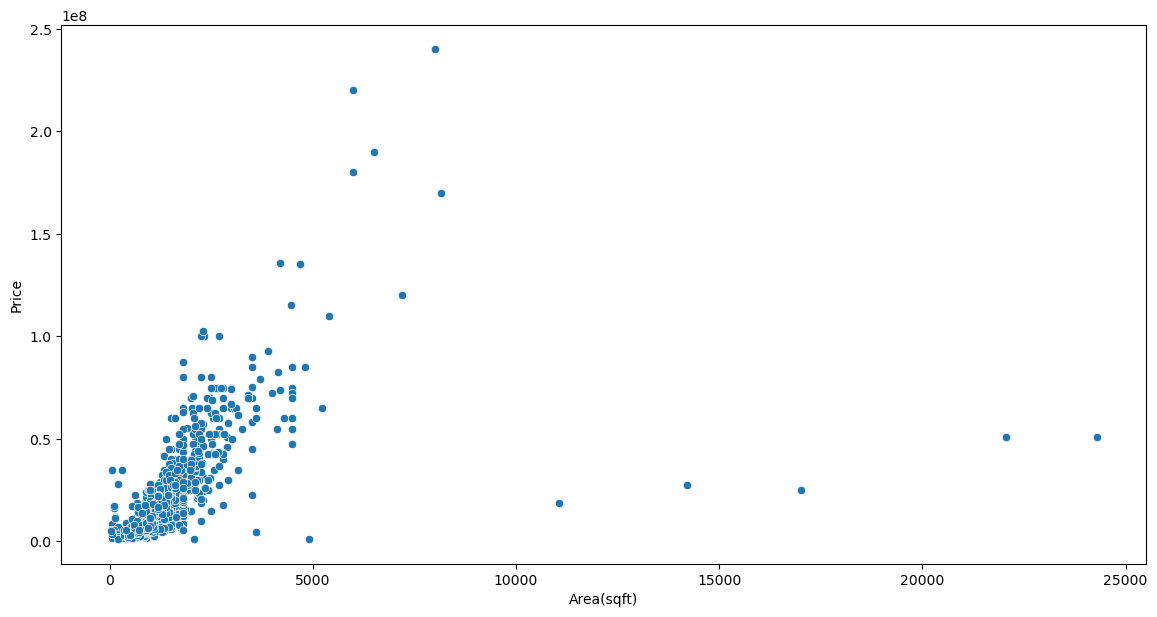

In [209]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df1["Area(sqft)"],y=df1.Price)

In [210]:
df1.drop('Per_Sqft',axis=1,inplace=True) #Because it consist of hige numbers of nan values

In [211]:
df1.Bathroom.fillna(df1.Bathroom.median(),inplace=True)
df1.Type.fillna('Apartment',inplace=True)
df1.Furnishing.fillna('Semi-Furnished',inplace=True)

In [212]:
df1.isnull().sum()

Area(sqft)     0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
dtype: int64

# Machine Training


In [213]:
# Here at this point we can use this data to train our machine learning model.
'''In this data we will use multiple linear regression model in order to take various factors together at the same time and predict the right value of the 
property.'''

#Saving new data file
df1.to_csv('filtered_data.csv',index=False)

In [214]:
df = pd.read_csv("filtered_data.csv")

In [215]:
df

,Area(sqft),BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...,...,...,...,...,...,...
1237,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor
1238,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor
1239,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor
1240,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor


In [216]:
# Setting Variables

X = df[["Area(sqft)","BHK","Bathroom","Parking"]]
y = df["Price"]



In [217]:
# test - train data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104,test_size=0.25,shuffle=True)

In [218]:
X_train

,Area(sqft),BHK,Bathroom,Parking
973,1350.0,3,3.0,1.0
415,900.0,3,2.0,1.0
753,1600.0,3,3.0,1.0
1208,1250.0,3,3.0,1.0
1011,1775.0,3,3.0,1.0
...,...,...,...,...
1151,1400.0,3,3.0,1.0
166,1000.0,2,2.0,1.0
654,2500.0,4,4.0,2.0
729,1800.0,4,4.0,2.0


In [219]:
X_test

,Area(sqft),BHK,Bathroom,Parking
171,720.0,3,2.0,1.0
564,1100.0,2,2.0,1.0
9,1300.0,4,4.0,1.0
439,1500.0,3,3.0,1.0
441,2000.0,4,4.0,2.0
...,...,...,...,...
944,900.0,2,2.0,0.0
463,1700.0,3,2.0,2.0
264,2799.0,4,4.0,0.0
534,1450.0,3,3.0,1.0


In [220]:
y_train

973     11000000
415      9500000
753     10800000
1208    24000000
1011    25500000
          ...   
1151    19000000
166      7600000
654     52500000
729     12000000
69      14200000
Name: Price, Length: 931, dtype: int64

In [221]:
y_test

171     6000000
564    16300000
9      15000000
439    12500000
441    36500000
         ...   
944     8000000
463    31000000
264    65000000
534    34000000
160     2000000
Name: Price, Length: 311, dtype: int64

## Multiple linear regression without one hot encodding

In [222]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [223]:
print(regr.coef_)

[3.47682298e+03 1.23027582e+06 1.23148173e+07 3.08688908e+06]


In [224]:
# Here we can see that the correlation coefficient is positive for all the attributes 
# So we can now use the multiple regression model without any doubt.

In [225]:
# Testing

predicted_price = regr.predict([[750,3,2,2]])
print(f"Predicted Price = {predicted_price[0].round()}")

Predicted Price = 13596325.0


In [226]:
# Cheking the accuracy of our model

actual_price = []
predicted_price = []
for i,j in X_test.iterrows():
    pre = regr.predict([[j[0],j[1],j[2],j[3]]])
    actual_price.append(y_test[i])
    predicted_price.append(pre[0])
    
score = r2_score(actual_price,predicted_price)
print("The accuracy of our model is {}%".format(round(score, 2) *100))  # 54%

The accuracy of our model is 54.0%


## Multiple linear Regression with one hot encodding

In [227]:
# Due to low accuracy of our predictions we are using the concept of one hot encodding in order to increase the accuracy of the predictions.
# Taking categorical data into effect.

#method for one hot encodding
df1 = pd.get_dummies(df,columns=["Status","Furnishing","Transaction","Type"])

In [228]:
df1

,Area(sqft),BHK,Bathroom,Locality,Parking,Price,Status_Almost_ready,Status_Ready_to_move,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000,0,1,0,1,0,1,0,0,1
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,0,1,0,1,0,1,0,1,0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,0,1,1,0,0,0,1,1,0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,0,1,0,1,0,0,1,0,1
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,4118.0,4,5.0,Chittaranjan Park,3.0,55000000,0,1,0,0,1,1,0,0,1
1238,1050.0,3,2.0,Chittaranjan Park,3.0,12500000,0,1,0,1,0,0,1,0,1
1239,875.0,3,3.0,Chittaranjan Park,3.0,17500000,0,1,0,1,0,1,0,0,1
1240,990.0,2,2.0,Chittaranjan Park Block A,1.0,11500000,0,1,0,0,1,0,1,0,1


In [229]:
# Setting Variables for new regression model

X = df1[["Area(sqft)","BHK","Bathroom","Parking","Status_Almost_ready","Status_Ready_to_move","Furnishing_Furnished","Furnishing_Semi-Furnished"
         ,"Furnishing_Unfurnished","Transaction_New_Property","Transaction_Resale","Type_Apartment","Type_Builder_Floor"]]
y = df1["Price"]

# Preparing data for new model
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104,test_size=0.25,shuffle=True)

In [230]:
regr1 = LinearRegression()
regr1.fit(X_train, y_train)

LinearRegression()

In [231]:
print(regr1.coef_)

[ 3.37014492e+03  1.37506241e+06  1.19404629e+07  3.27825768e+06
  2.10866879e+06 -2.10866879e+06 -6.38268665e+05 -4.42642133e+05
  1.08091080e+06  1.15533029e+06 -1.15533029e+06 -1.14254989e+05
  1.14254989e+05]


In [232]:
# Cheking the accuracy of our new model

actual_price = []
predicted_price = []
for i,j in X_test.iterrows():
    pre = regr1.predict([[j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7],j[8],j[9],j[10],j[11],j[12]]])
    actual_price.append(y_test[i])
    predicted_price.append(pre[0])
    
score = r2_score(actual_price,predicted_price)
print("The accuracy of our model is {}%".format(round(score, 2) *100))  # 55%

The accuracy of our model is 55.00000000000001%


# Using Decision Tree regressor

In [233]:
# Since we are getting the accuracy of 55% in multiple linear regression model we are now using decesion tree in order to increase the accuracy.

regr2 = DecisionTreeRegressor(random_state = 0) 

In [234]:
regr2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [235]:
# Cheking the accuracy of our new model

actual_price = []
predicted_price = []
for i,j in X_test.iterrows():
    pre = regr2.predict([[j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7],j[8],j[9],j[10],j[11],j[12]]])
    actual_price.append(y_test[i])
    predicted_price.append(pre[0])
    
score = r2_score(actual_price,predicted_price)
print("The accuracy of our model is {}%".format(round(score, 2) *100))  # 77%

The accuracy of our model is 77.0%


# Now we can use our machine learning model to predict the most accurate price of the property.